In [22]:
import matplotlib.pyplot as plt
import numpy as np

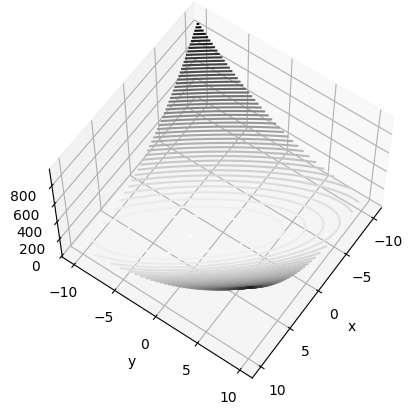

In [33]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
def fun(x1,x2):
    return (3*(x1**2))+(2*(x2**2))+(4*x1*x2)-(5*x1)+6

# x = np.linspace(-10, 10, 30)
# y = np.linspace(-10, 10, 30)

# X, Y = np.meshgrid(x, y)
# Z = fun(X, Y)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(X, Y, Z, color='black')
# ax.set_title('function');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(60, 35)

# as we can see the graph approaches downward as the color lightens up thus f(x) is a minimum.

#another way is that we can take the second partial derivative, refer to the pdf
# https://en.wikipedia.org/wiki/Second_partial_derivative_test


In [34]:
def gradDescent(x0,alpha,iteration):
    bound = 0.000001 # setting a bound when to stop
    
    currX1 = x0[0]
    currX2 = x0[1]
    # partial derviatives of the original function
    gfun1 = lambda x1,x2: (6*x1) + (4*x2) - 5
    gfun2 = lambda x1,x2: (4*x2) + (4*x1)
    
    for _ in range(iteration): # iterations until the loop ends
        prevTemp1 = currX1 # store previous x1 to check bounds
        currX1 = prevTemp1 - alpha * gfun1(prevTemp1, currX2) # gradient descent
        if (abs(currX1-prevTemp1)<=bound): # check bound
            break
    
    for _ in range(iteration): # iterations until the loop ends
        prevTemp2  = currX2 # store previous x2 to check bounds
        currX2  = prevTemp2 - alpha * gfun2(currX1,prevTemp2)# gradient descent
        if (abs(currX2-prevTemp2)<=bound): # check bound
            break
            
    return [currX1,currX2]
    
    

alpha:1e-05
[0.04853096804849667, -0.0019029637790753363]
0.04662800426942133
alpha:0.0001
[0.3760726505294724, -0.12400378580914433]
0.2520688647203281
alpha:0.001
[0.8313047018965545, -0.8162004694494053]
0.015104232447149202
alpha:0.01
[0.8333177979852843, -0.8332946497680817]
2.3148217202617616e-05
alpha:0.1
[0.833332975419392, -0.8333315539056011]
1.421513790900164e-06
alpha:1
[-7777196820860157324917412872698476413475762053097566871847619498299724258131463620453669392482342519663291582752702021868462396011283603290346006810032756301953422217819376252283292299882515262592504089968875942652004270956632781590043152259378459198422486490453554009328915118572174660183480524253689987134745407392895554400052736403772061910515248851376689943294079113392648755530572842211998379422651136004998706883682950843443580248912518287621749201788405569677039941266956890538480482724300395167216136575347815798517653042317046305237035616044895976065456639846302886697623980681390832128267243878661866739

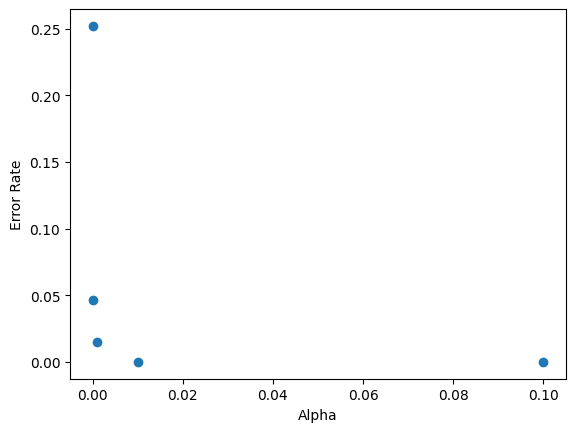

In [40]:
x0 = [0,0]
iteration = 1000
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
errorRate = []

for i in alphas:
    res = gradDescent(x0,i,iteration)
    error = abs(res[0])-abs(res[1])
    print(f'alpha:{i}')
    print(res)
    errorRate.append(error)
    print(error)
plt.xlabel("Alpha")
plt.ylabel("Error Rate")
plt.scatter(alphas[:5],errorRate[:5])# can't plot the last 2 because too large, diveraged

I have only plotted the first 5 plots, as we can see the it has diverged after the alpha is 1 and 10. The numbers are dramatically increased. As we can see in this plot it started to fully converge from where the alpha is 0.01 and 0.1.